# Estrategia Short Call

In [1]:
# Importar librerías
import yfinance as yf
import numpy as np
import emoji # pip install emoji 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display
import ipywidgets as widgets

In [2]:
# Descarga de datos reales
activo = "AAPL"

df = yf.download(tickers=activo, period="1d", multi_level_index=False)
precio_actual = df["Close"].iloc[-1]
f"Precio Actual: {round(precio_actual, 4)}"

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


'Precio Actual: 204.91'

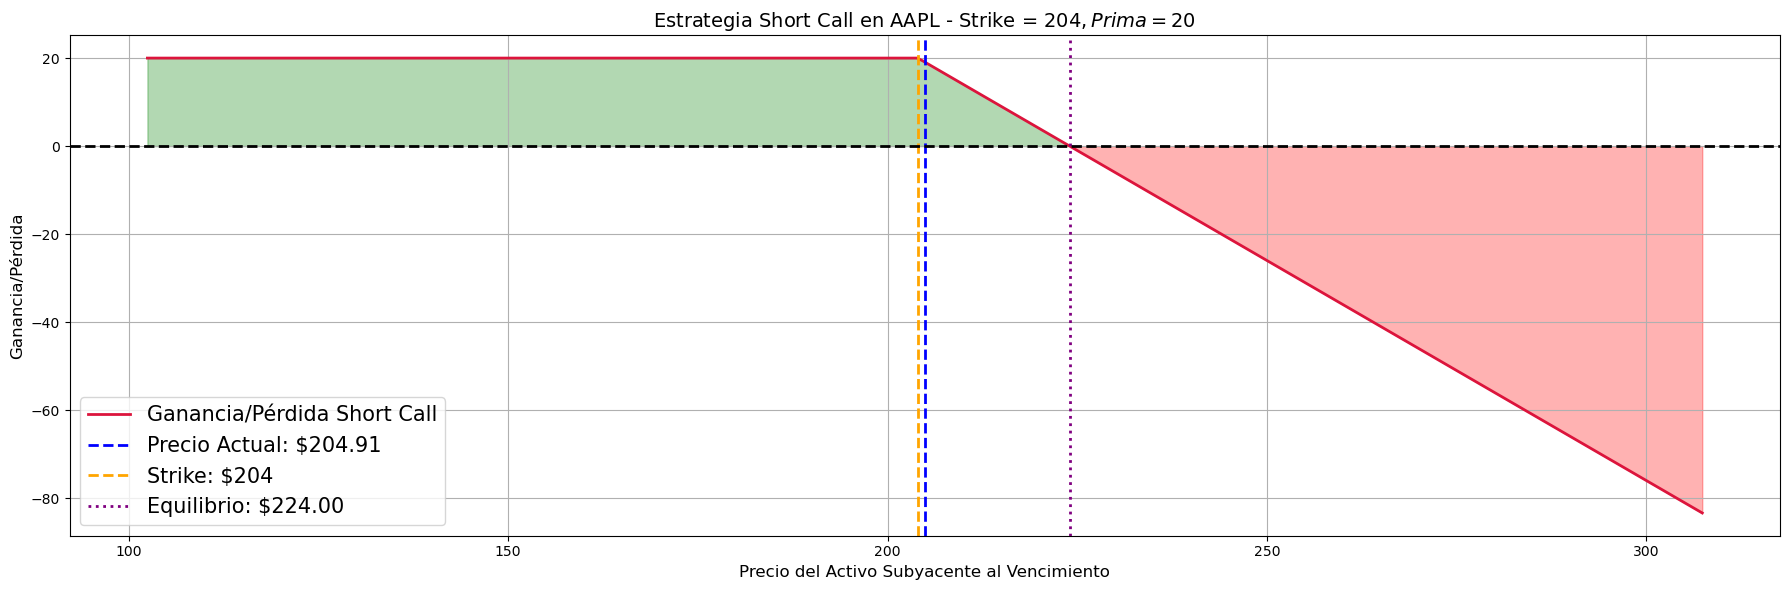


📊 RESUMEN
 - Activo: AAPL
 - Precio Actual: $204.91
 - Precio de Ejercicio (Strike): $204
 - Prima recibida: $20
 - Punto de Equilibrio: $224
 - Ganancia máxima: $20 (si el activo cierra por debajo de $204)
 - Pérdida Potencial: Ilimitada (si el activo sube mucho)
⚠️ Opción dentro del dinero: aún hay ganancia, pero se acerca al umbral de pérdida


In [3]:
# Función de Visualización
def estrategia_short_call(strike: float, prima: float):

    """
    Función que visualiza y analiza el perfil de riesgo/beneficio de una estrategia
    de venta de calls (short call) sobre un activo subyacente.
    """

    # Crear rango de precios finales
    precios_finales = np.linspace(precio_actual * 0.5, precio_actual * 1.5, 300)
    beneficio = prima - np.maximum(precios_finales - strike, 0)
    punto_equilibrio = strike + prima

    # Generar Figura
    fig, ax = plt.subplots(figsize=(18, 6), dpi=100)
    ax.plot(precios_finales, beneficio, label="Ganancia/Pérdida Short Call", color="crimson", linewidth=2)

    # Líneas de referencia
    ax.axvline(x=precio_actual, color="blue", linestyle="--", lw=2, label=f"Precio Actual: ${precio_actual:.2f}")
    ax.axvline(x=strike, color="orange", linestyle="--", lw=2, label=f"Strike: ${strike}")
    ax.axvline(x=punto_equilibrio, color="purple", linestyle=":", lw=2, label=f"Equilibrio: ${punto_equilibrio:.2f}")
    ax.axhline(y=0, color="black", linestyle="--", lw=2)

    # Relleno visual (áreas de beneficio/pérdida)
    ax.fill_between(precios_finales, beneficio, 0, where=beneficio >= 0, color="green", alpha=0.3)
    ax.fill_between(precios_finales, beneficio, 0, where=beneficio < 0, color="red", alpha=0.3)

    # Añadir Títulos y etiquetas
    ax.set_title(f"Estrategia Short Call en {activo} - Strike = ${strike}, Prima = ${round(prima, 4)}", fontsize=14)
    ax.set_xlabel("Precio del Activo Subyacente al Vencimiento", fontsize=12)
    ax.set_ylabel("Ganancia/Pérdida", fontsize=12)
    ax.legend(fontsize=15)
    ax.grid()
    plt.tight_layout()
    plt.show()

    # Imprimir un resumen
    print(f"\n{emoji.emojize(':bar_chart:')} RESUMEN")
    print(f" - Activo: {activo}")
    print(f" - Precio Actual: ${precio_actual:.2f}")
    print(f" - Precio de Ejercicio (Strike): ${strike}")
    print(f" - Prima recibida: ${prima}")
    print(f" - Punto de Equilibrio: ${round(punto_equilibrio, 4)}")
    print(f" - Ganancia máxima: ${round(prima, 4)} (si el activo cierra por debajo de ${strike})")
    print(f" - Pérdida Potencial: Ilimitada (si el activo sube mucho)")

    if precio_actual > punto_equilibrio:
        print(f"{emoji.emojize(':cross_mark:')} Opción en pérdida: El precio del activo supera el punto de equilibrio.")
    elif precio_actual > strike:
        print(f"{emoji.emojize(':warning:')} Opción dentro del dinero: aún hay ganancia, pero se acerca al umbral de pérdida")
    else:
        print(f"{emoji.emojize(':check_mark_button:')} Opción fuera del dinero: ganancia máxima asegurada si se mantiene este nivel")

        
# Comprobar funcionamiento
strike = int(precio_actual)
prima = int(precio_actual * 0.10)
estrategia_short_call(strike=strike, prima=prima)

## Plot Interactivo

In [4]:
# Definir un Control Deslizante para el Precio de Ejercicio
strike_slider = widgets.IntSlider(min=int(precio_actual * 0.80), max=int(precio_actual*1.5), step=1, value=strike,
                                 description="Strike")
# Definir otro Control Deslizante para la prima
prima_slider = widgets.FloatSlider(min=1, max=30, step=0.5, value=prima, description="prima")
# Agrupar ambos controles deslizantes en una sola fila horizontal
ui = widgets.HBox([strike_slider, prima_slider])
# Conectar los Controles con la Función
out = widgets.interactive_output(f=estrategia_short_call, controls={"strike": strike_slider, "prima": prima_slider})

# Desplegar nuestro plot interactivo
display(ui, out)

Output()

## Ejemplo Numérico de Margen para Short Call

Cuando vendemos un call (short call), el broker requiere que mantengamos un margen para cubrir posibles pérdidas. Los requisitos de margen varían según el broker y el tipo de cuenta, pero generalmente siguen estas reglas:

<strong>Cálculo típico de margen para short call:</strong>

    1. Prima recibida: Se suma la prima total recibida por la venta del call.

    2. Margen adicional: Se toma el mayor de los siguientes dos valores:

        * 20% del valor del subyacente menos cualquier cantidad en que el call esté out of money.

        * 10% del valor del subyacente.

In [5]:
# Ejemplo Numérico. Datos del trade:

activo = "AAPL"
precio_actual = 180
posicion = "Short Call"
strike = 190
prima = 5 * 100 # 5 Dólares x 100 acciones (1 contrato contiene 100 acciones)

# Cálculo de cuánto está OTM
otm = max(0, strike - precio_actual)

# Dos posibles márgenes
margen_a = 0.20 * precio_actual * 100 - otm * 100 + prima
margen_b = 0.10 * precio_actual * 100 + prima

# Seleccionar el mayor
margen_total = max(margen_a, margen_b)

# Mostrar resultado
print(f"El margen requerido para esta posición short call descubierta es de ${margen_total:.2f} USD")

El margen requerido para esta posición short call descubierta es de $3100.00 USD


### Recordatorio:

    - Una posición short call consiste en vender una opción de compra, obligándote a vender el activo subyacente si el comprador ejerce, a cambio de recibir una prima adicional.
    - Esta estrategia presenta riesgo teóricamente ilimitado si el precio del activo sube mucho, ya que deberás entregar el activo a un precio fijo, comprándolo más caro en el mercado.
    - El broker exige un margen inicial para cubrir riesgos. Este margen puede aumentar si sube el activo o la volatilidad, reflejando la mayor exposición a pérdidas por parte del vendedor.